In [31]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib as plt
%matplotlib inline
import os as os

In [32]:
os.chdir("../input")

In [33]:
os.listdir()

['heart.csv']

In [34]:
data=pd.read_csv('../input/heart.csv')

In [35]:
data.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [36]:
data.shape

(303, 14)

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
train,test=train_test_split(data,test_size=0.2)

In [39]:
len(train)

242

In [40]:
len(test)

61

In [41]:
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


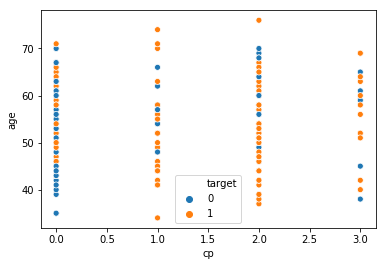

In [42]:
sb.scatterplot(x=train['cp'], y= train['age'],hue=train['target'],data=train)

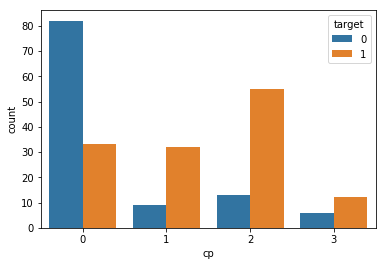

In [43]:
sb.countplot(x=train['cp'],hue=train['target'],data=train)

In [44]:
train.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

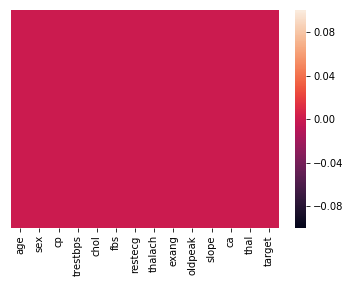

In [45]:
sb.heatmap(train.isnull(),yticklabels=False,cbar='False')

In [46]:
train.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000
mean,54.578512,0.657025,0.954545,132.202479,247.561983,0.140496,0.524793,149.896694,0.322314,1.064050,1.400826,0.743802,2.330579,0.545455
std,8.858268,0.475687,1.027627,17.716893,48.767191,0.348221,0.532555,22.814280,0.468331,1.181105,0.611507,1.042889,0.595814,0.498962
min,34.000000,0.000000,0.000000,94.000000,141.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.250000,0.000000,0.000000,136.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,243.000000,0.000000,1.000000,153.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.750000,0.000000,1.000000,166.750000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,76.000000,1.000000,3.000000,200.000000,417.000000,1.000000,2.000000,195.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [47]:
test.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

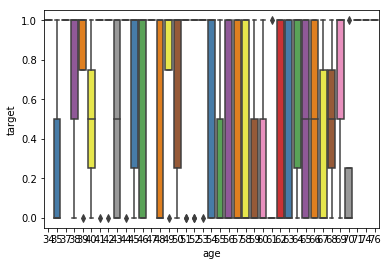

In [48]:
sb.boxplot(x='age',y='target',data=train,palette='Set1')

In [49]:
train_out=train['target']

In [50]:
train_in=train.drop(['target'],axis=1)

In [51]:
train_in.shape

(242, 13)

In [52]:
from sklearn.linear_model import LogisticRegression

In [53]:
log_reg=LogisticRegression()
log_reg.fit(train_in,train_out)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [54]:
test_out=test['target']

In [55]:
test_in=test.drop(['target'],axis=1)

In [56]:
prediction=log_reg.predict(test_in)

In [57]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [58]:
accuracy_score(test_out,prediction)*100

85.24590163934425

In [59]:
confusion_matrix(test_out,prediction)

array([[21,  7],
       [ 2, 31]])

In [60]:
print(classification_report(test_out,prediction))

              precision    recall  f1-score   support

           0       0.91      0.75      0.82        28
           1       0.82      0.94      0.87        33

   micro avg       0.85      0.85      0.85        61
   macro avg       0.86      0.84      0.85        61
weighted avg       0.86      0.85      0.85        61

